Importing Libraries

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


Reading the Data

In [148]:
data =  pd.read_csv('./Data/basetable.csv')

Checking the Data

In [149]:
data.drop('Unnamed: 0', inplace = True, axis = 1)
data.drop('client_id', inplace = True, axis = 1)
data.head()

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe,job_admin.,...,age-group_80-90,age-group_90-100,campaign_missing,pdays_missing,previous_missing,emp.var.rate_missing,cons.price.idx_missing,cons.conf.idx_missing,euribor3m_missing,nr.employed_missing
0,1.0,999.0,0.0,1.4,93.918,-42.7,4.968,5228.1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,999.0,0.0,1.4,94.465,-41.8,4.960,5228.1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,999.0,0.0,-1.8,92.893,-46.2,1.264,5099.1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,999.0,0.0,-1.8,93.075,-47.1,1.453,5099.1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,999.0,0.0,1.1,93.994,-36.4,4.859,5191.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   campaign                       20000 non-null  float64
 1   pdays                          20000 non-null  float64
 2   previous                       20000 non-null  float64
 3   emp.var.rate                   20000 non-null  float64
 4   cons.price.idx                 20000 non-null  float64
 5   cons.conf.idx                  20000 non-null  float64
 6   euribor3m                      20000 non-null  float64
 7   nr.employed                    20000 non-null  float64
 8   subscribe                      20000 non-null  int64  
 9   job_admin.                     20000 non-null  int64  
 10  job_blue-collar                20000 non-null  int64  
 11  job_entrepreneur               20000 non-null  int64  
 12  job_housemaid                  20000 non-null 

In [151]:
y = data['subscribe']
X = data.drop('subscribe', axis = 1)
print(X.shape)
print(y.shape)

(20000, 82)
(20000,)


In [ ]:
from sklearn.model_selection import cross_validate

logreg = LogisticRegression(random_state=0, max_iter=1000)
cv_results = cross_validate(logreg, X, y, cv=5)
cv_results['test_score']

In [152]:
logreg = LogisticRegression(random_state=0, max_iter=1000)
    # split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

logreg.fit(X_train, y_train)

# predict probabilities
pred_train = logreg.predict_proba(X_train)
pred_test = logreg.predict_proba(X_test)


In [153]:
pred_train = pd.DataFrame(pred_train)
pred_test = pd.DataFrame(pred_test)

In [154]:
pd.DataFrame(y)

,subscribe
0,0
1,0
2,0
3,0
4,0
...,...
19995,1
19996,0
19997,0
19998,0


In [155]:
percentage = data[data.subscribe == 1].shape[0]/data.shape[0]

In [156]:
pred_train.loc[pred_train[1] > percentage, 'y'] = 1
pred_test.loc[pred_test[1] > percentage, 'y'] = 1

In [157]:
pred_train['y'] =  np.where(pred_train['y'] == 1, 1, 0)
pred_test['y'] =  np.where(pred_test['y'] == 1, 1, 0)

In [158]:
pred_train['y']

0        1
1        1
2        0
3        0
4        0
        ..
13995    0
13996    1
13997    0
13998    1
13999    1
Name: y, Length: 14000, dtype: int32

In [159]:
# evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train['y'])
mlp_acc_test = accuracy_score(y_test, pred_test['y'])

eval_dict = {"logreg": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict

{'logreg': {'Acc_train': 0.7885714285714286, 'Acc_test': 0.7866666666666666}}

In [160]:
print(roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]))

0.7564718045398569
0.7531517108617074


C:\tools\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


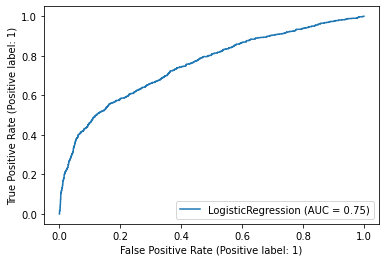

In [161]:
from sklearn import datasets, metrics

metrics.plot_roc_curve(logreg, X_test, y_test)
plt.show()

In [162]:
y_test.value_counts()

0    5319
1     681
Name: subscribe, dtype: int64

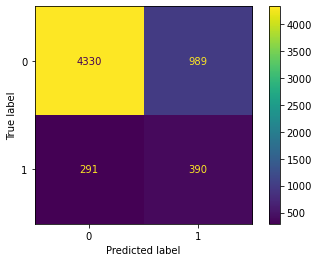

In [163]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test['y'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Forward and Backward feature selection using Ridge top 10 feature

In [168]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from time import time
from sklearn.linear_model import RidgeCV

feature_names = np.array(X.columns)
ridge = RidgeCV(alphas=np.logspace(-3, 3, num=5)).fit(X, y)

tic_fwd = time()
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select=15, direction="forward"
).fit(X, y)
toc_fwd = time()

tic_bwd = time()
sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=15, direction="backward"
).fit(X, y)
toc_bwd = time()



In [169]:
print(
    "Features selected by backward sequential selection: "
    f"{feature_names[sfs_backward.get_support()]}"
)
print(f"Done in {toc_bwd - tic_bwd:.3f}s")

Features selected by backward sequential selection: ['pdays' 'cons.conf.idx' 'nr.employed' 'job_blue-collar'
 'contact_telephone' 'month_jul' 'month_jun' 'month_mar' 'month_may'
 'day_of_week_mon' 'poutcome_nonexistent' 'poutcome_success'
 'pdays_missing' 'cons.conf.idx_missing' 'nr.employed_missing']
Done in 2140.610s


In [170]:
print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
)
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

Features selected by forward sequential selection: ['job_student' 'marital_single' 'default_no' 'contact_telephone'
 'month_apr' 'month_dec' 'month_jun' 'month_mar' 'month_oct' 'month_sep'
 'day_of_week_mon' 'poutcome_success' 'age-group_60-70' 'age-group_70-80'
 'age-group_80-90']
Done in 148.104s


Forward Feature Selection 

In [171]:
logreg = LogisticRegression(random_state=0, max_iter=1000)
    # split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X[feature_names[sfs_forward.get_support()]], y, stratify=y, test_size=0.3, random_state=42)

logreg.fit(X_train, y_train)

# predict probabilities
pred_train = logreg.predict_proba(X_train)
pred_test = logreg.predict_proba(X_test)

In [172]:
percentage = data[data.subscribe == 1].shape[0]/data.shape[0]
pred_train = pd.DataFrame(pred_train)
pred_test = pd.DataFrame(pred_test)
pred_train.loc[pred_train[1] > percentage, 'y'] = 1
pred_test.loc[pred_test[1] > percentage, 'y'] = 1
pred_train['y'] =  np.where(pred_train['y'] == 1, 1, 0)
pred_test['y'] =  np.where(pred_test['y'] == 1, 1, 0)
# evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train['y'])
mlp_acc_test = accuracy_score(y_test, pred_test['y'])

eval_dict = {"logreg": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict

{'logreg': {'Acc_train': 0.8500714285714286, 'Acc_test': 0.8448333333333333}}

In [173]:
print(roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]))

0.7510465033777792
0.7542279788826746


C:\tools\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


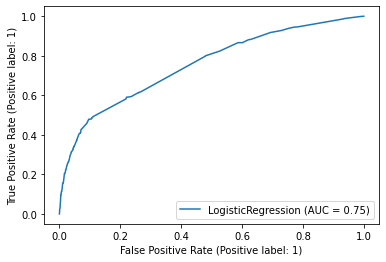

In [174]:
from sklearn import datasets, metrics

metrics.plot_roc_curve(logreg, X_test, y_test)
plt.show()

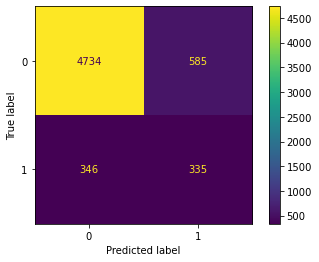

In [175]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test['y'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Backward Feature Selection 10 features

In [202]:
logreg = LogisticRegression(random_state=0, max_iter=100000, penalty='l2')
    # split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X[feature_names[sfs_backward.get_support()]], y, stratify=y,  test_size=0.3, random_state=42)

logreg.fit(X_train, y_train)

# predict probabilities
pred_train = logreg.predict_proba(X_train)
pred_test = logreg.predict_proba(X_test)

In [203]:
percentage = data[data.subscribe == 1].shape[0]/data.shape[0]
pred_train = pd.DataFrame(pred_train)
pred_test = pd.DataFrame(pred_test)
pred_train.loc[pred_train[1] > percentage, 'y'] = 1
pred_test.loc[pred_test[1] > percentage, 'y'] = 1
pred_train['y'] =  np.where(pred_train['y'] == 1, 1, 0)
pred_test['y'] =  np.where(pred_test['y'] == 1, 1, 0)
# evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train['y'])
mlp_acc_test = accuracy_score(y_test, pred_test['y'])

eval_dict = {"logreg": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict

{'logreg': {'Acc_train': 0.5809285714285715, 'Acc_test': 0.5845}}

In [204]:
print(roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]))

0.7073079125679737
0.7165170492615203


C:\tools\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


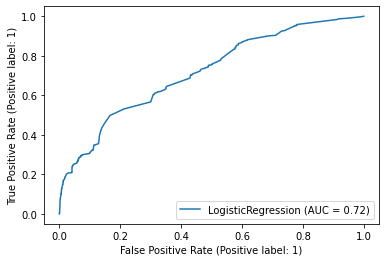

In [205]:
from sklearn import datasets, metrics

metrics.plot_roc_curve(logreg, X_test, y_test)
plt.show()

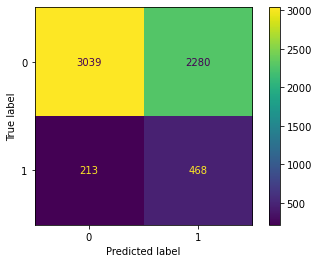

In [206]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test['y'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()